# Imports and setting up viz

In [112]:
import numpy as np
import netCDF4 as nc
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib.colors import ListedColormap
%matplotlib inline

In [113]:
plt.rcParams.update(
        {
            'figure.facecolor': 'white',
            'axes.facecolor': 'white',
            'font.size': 12,
            'figure.dpi': 72.0,
            'xtick.direction': 'in',
            'ytick.direction': 'in',
            'xtick.major.size': 5.0,
            'xtick.minor.size': 2.5,
            'ytick.major.size': 5.0,
            'ytick.minor.size': 2.5,
            'xtick.minor.visible': True,
            'ytick.minor.visible': True,
            'axes.grid': True,
            'axes.titlesize': 'larger',
            'axes.labelsize': 'larger',
            'grid.color': 'dimgray',
            'grid.linestyle': '-',
            'grid.alpha': 0.3,
            'axes.prop_cycle': cycler(
                color=[
                    '#0C5DA5',
                    '#FF9500',
                    '#00B945',
                    '#FF2C00',
                    '#845B97',
                    '#474747',
                    '#9E9E9E',
                ]
            ) * cycler(alpha=[0.8]),
            'scatter.marker': 'x',
            'lines.linewidth': 1.0,
        })

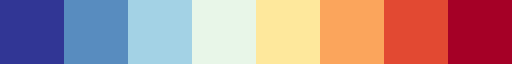

In [114]:
#define centered colorbar
emb = ListedColormap(mpl.colormaps['RdYlBu_r'](np.linspace(0, 1, 8)))
emb

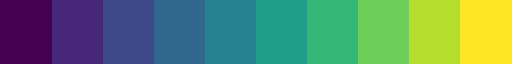

In [115]:
#define progressive colorbar
myvir = ListedColormap(mpl.colormaps['viridis'](np.linspace(0, 1, 10)))
myvir

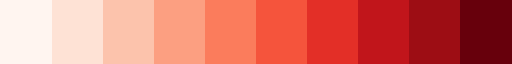

In [116]:
#define progressive colorbar
reds = ListedColormap(mpl.colormaps['Reds'](np.linspace(0, 1, 10)))
reds

# Load files
File to evaluate the behaviour of irrigation in native routing compared to standard.

First working on the same topographic grid (0.5°).

4 files are considered : one from the standard routing simulation, three from the native routing simulation (sechiba_history, diag_routing, diag_routing_r)

In [117]:
#open netcdf files for standard routing
filename = 'nat13/nat13_*_1M_sechiba_history.nc'
std = xr.open_mfdataset(filename)
std

<xarray.Dataset>
Dimensions:                 (lat: 36, lon: 38, solay: 11, veget: 15, nobio: 1,
                             time_counter: 4749, axis_nbounds: 2)
Coordinates:
  * lat                     (lat) float32 27.25 27.75 28.25 ... 44.25 44.75
  * lon                     (lon) float32 -14.75 -14.25 -13.75 ... 3.25 3.75
  * solay                   (solay) float32 0.0 0.001955 0.005865 ... 0.999 2.0
  * veget                   (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * nobio                   (nobio) float32 1.0
    time_centered           (time_counter) datetime64[ns] dask.array<chunksize=(366,), meta=np.ndarray>
  * time_counter            (time_counter) datetime64[ns] 2000-01-01T12:00:00...
Dimensions without coordinates: axis_nbounds
Data variables: (12/93)
    time_centered_bounds    (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    time_counter_bounds     (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    Areas                   (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    Contfrac                (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    evap                    (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    coastalflow             (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    ...                      ...
    Count_failure_fast      (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    Count_failure_stre      (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    root_deficit            (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    root_mc_fc              (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    irrigmap_dyn            (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    aei_sw                  (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
Attributes:
    name:         sechiba_history
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-06 11:27:48 GMT
    uuid:         b3239a74-5d1e-4e96-8277-a024966d417a
    LongName:     Ref config with new driver, WFDEI/v2 halfdeg, and VEGET_UPD...

In [118]:
#open netcdf files for native routing on ORC grid
filename = 'nat15/MO/nat15*'
natORC = xr.open_mfdataset(filename)
natORC

<xarray.Dataset>
Dimensions:                 (lat: 36, lon: 38, solay: 11, veget: 15, nobio: 1,
                             time_counter: 4749, axis_nbounds: 2)
Coordinates:
  * lat                     (lat) float32 27.25 27.75 28.25 ... 44.25 44.75
  * lon                     (lon) float32 -14.75 -14.25 -13.75 ... 3.25 3.75
  * solay                   (solay) float32 0.0 0.001955 0.005865 ... 0.999 2.0
  * veget                   (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * nobio                   (nobio) float32 1.0
    time_centered           (time_counter) datetime64[ns] dask.array<chunksize=(366,), meta=np.ndarray>
  * time_counter            (time_counter) datetime64[ns] 2000-01-01T12:00:00...
Dimensions without coordinates: axis_nbounds
Data variables: (12/85)
    time_centered_bounds    (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    time_counter_bounds     (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    Areas                   (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    Contfrac                (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    evap                    (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    coastalflow             (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    ...                      ...
    Count_failure_fast      (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    Count_failure_stre      (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    root_deficit            (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    root_mc_fc              (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    irrigmap_dyn            (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    aei_sw                  (time_counter, lat, lon) float32 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
Attributes:
    name:         sechiba_history
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-06 14:43:04 GMT
    uuid:         3bea1703-977c-4ef9-881d-5d1f7d7590a3
    LongName:     Ref config with new driver, WFDEI/v2 halfdeg, and VEGET_UPD...

In [119]:
#open netcdf files for native routing diag_routing.nc (on ORC grid)
filename = 'nat15/DA/nat15_*_routing.nc'
natDIAG = xr.open_mfdataset(filename)
natDIAG

<xarray.Dataset>
Dimensions:                        (lat_domain_landpoints: 36,
                                    lon_domain_landpoints: 38,
                                    lat_domain_landpoints_routing: 36,
                                    lon_domain_landpoints_routing: 38,
                                    lat_routing_domain: 40,
                                    lon_routing_domain: 42, time_counter: 4749,
                                    axis_nbounds: 2)
Coordinates:
  * lat_domain_landpoints          (lat_domain_landpoints) float32 27.25 ... ...
  * lon_domain_landpoints          (lon_domain_landpoints) float32 -14.75 ......
  * lat_domain_landpoints_routing  (lat_domain_landpoints_routing) float32 27...
  * lon_domain_landpoints_routing  (lon_domain_landpoints_routing) float32 -1...
  * lat_routing_domain             (lat_routing_domain) float32 45.75 ... 26.25
  * lon_routing_domain             (lon_routing_domain) float32 -15.75 ... 4.75
    time_instant                   (time_counter) datetime64[ns] dask.array<chunksize=(366,), meta=np.ndarray>
  * time_counter                   (time_counter) datetime64[ns] 2000-01-01T1...
    time_centered                  (time_counter) datetime64[ns] dask.array<chunksize=(366,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/14)
    time_instant_bounds            (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    time_counter_bounds            (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    time_centered_bounds           (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    routing_runoff                 (time_counter, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    routing_drainage               (time_counter, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    routing_coastalflow            (time_counter, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    ...                             ...
    routing_fast_reservoir         (time_counter, lat_domain_landpoints_routing, lon_domain_landpoints_routing) float64 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    routing_slow_reservoir         (time_counter, lat_domain_landpoints_routing, lon_domain_landpoints_routing) float64 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    routing_stream_reservoir       (time_counter, lat_domain_landpoints_routing, lon_domain_landpoints_routing) float64 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    routing_irrigation             (time_counter, lat_domain_landpoints_routing, lon_domain_landpoints_routing) float64 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
    routing_basins_area            (time_counter, lat_routing_domain, lon_routing_domain) float64 dask.array<chunksize=(366, 40, 42), meta=np.ndarray>
    routing_stream_diag            (time_counter, lat_domain_landpoints_routing, lon_domain_landpoints_routing) float64 dask.array<chunksize=(366, 36, 38), meta=np.ndarray>
Attributes:
    name:         diag_routing
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-06 14:43:08 GMT
    uuid:         fdfb88da-bd30-4881-b580-182b74c97ae6

In [120]:
#open netcdf files for native routing diag_routing.nc (on MERIT grid)
filename = 'nat15/DA/nat15_*_routing_r.nc'
natDIAG_R = xr.open_mfdataset(filename)
natDIAG_R

<xarray.Dataset>
Dimensions:                     (lat: 40, lon: 42, basins: 200,
                                 time_counter: 4749, axis_nbounds: 2)
Coordinates:
  * lat                         (lat) float32 45.75 45.25 44.75 ... 26.75 26.25
  * lon                         (lon) float32 -15.75 -15.25 -14.75 ... 4.25 4.75
  * basins                      (basins) |S255 b'Amazon\x00                  ...
    time_instant                (time_counter) datetime64[ns] dask.array<chunksize=(366,), meta=np.ndarray>
  * time_counter                (time_counter) datetime64[ns] 2000-01-01T12:0...
    time_centered               (time_counter) datetime64[ns] dask.array<chunksize=(366,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/18)
    time_instant_bounds         (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    time_counter_bounds         (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    time_centered_bounds        (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    flow_r                      (time_counter, lat, lon) float64 dask.array<chunksize=(366, 40, 42), meta=np.ndarray>
    routing_runoff_r            (time_counter, lat, lon) float64 dask.array<chunksize=(366, 40, 42), meta=np.ndarray>
    routing_lakeinflow_r        (time_counter, lat, lon) float64 dask.array<chunksize=(366, 40, 42), meta=np.ndarray>
    ...                          ...
    routing_hydrographs_r       (time_counter, lat, lon) float64 dask.array<chunksize=(366, 40, 42), meta=np.ndarray>
    irrig_netereq_r             (time_counter, lat, lon) float64 dask.array<chunksize=(366, 40, 42), meta=np.ndarray>
    routing_irrigation_r        (time_counter, lat, lon) float64 dask.array<chunksize=(366, 40, 42), meta=np.ndarray>
    basins_riverflow            (time_counter, basins) float64 dask.array<chunksize=(366, 200), meta=np.ndarray>
    routing_basins_area         (time_counter, lat, lon) float64 dask.array<chunksize=(366, 40, 42), meta=np.ndarray>
    routing_stream_diag_r       (time_counter, lat, lon) float64 dask.array<chunksize=(366, 40, 42), meta=np.ndarray>
Attributes:
    name:         diag_routing_r
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-06 14:43:08 GMT
    uuid:         e417188b-d6df-4174-a3f6-932f37b66bc5

# File manipulations

In [121]:
#rename time_counter to time all files
std = std.rename({'time_counter' : 'time'})
natORC = natORC.rename({'time_counter' : 'time'})
natDIAG = natDIAG.rename({'time_counter' : 'time'})
natDIAG_R = natDIAG_R.rename({'time_counter' : 'time'})

In [122]:
# Remove first years to consider a spinup
spinupyears=[2000,2001,2002]
# spinupyears=[]
for year in spinupyears:
    std = std.where(std['time.year'] != year, drop=True)
    natORC = natORC.where(natORC['time.year'] != year, drop=True)
    natDIAG = natDIAG.where(natDIAG['time.year'] != year, drop=True)
    natDIAG_R = natDIAG_R.where(natDIAG_R['time.year'] != year, drop=True)

In [123]:
#Rename lat_domain_landpoints to lat and lon_domain_landpoints to lon in natDIAG (for runoff and drainage)
# natDIAG = natDIAG.rename({'lat_domain_landpoints':'lat','lon_domain_landpoints':'lon'})

#OR do it for lat_domain_landpoints_routing and lon_domain_landpoints_routing (for reservoirs)

natDIAG = natDIAG.rename({'lat_domain_landpoints_routing':'lat','lon_domain_landpoints_routing':'lon'})
natDIAG

<xarray.Dataset>
Dimensions:                   (time: 3653, axis_nbounds: 2,
                               lat_domain_landpoints: 36,
                               lon_domain_landpoints: 38, lat: 36, lon: 38,
                               lat_routing_domain: 40, lon_routing_domain: 42)
Coordinates:
  * lat_domain_landpoints     (lat_domain_landpoints) float32 27.25 ... 44.75
  * lon_domain_landpoints     (lon_domain_landpoints) float32 -14.75 ... 3.75
  * lat                       (lat) float32 27.25 27.75 28.25 ... 44.25 44.75
  * lon                       (lon) float32 -14.75 -14.25 -13.75 ... 3.25 3.75
  * lat_routing_domain        (lat_routing_domain) float32 45.75 45.25 ... 26.25
  * lon_routing_domain        (lon_routing_domain) float32 -15.75 ... 4.75
    time_instant              (time) datetime64[ns] dask.array<chunksize=(365,), meta=np.ndarray>
  * time                      (time) datetime64[ns] 2003-01-01T12:00:00 ... 2...
    time_centered             (time) datetime64[ns] dask.array<chunksize=(365,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/14)
    time_instant_bounds       (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(365, 2), meta=np.ndarray>
    time_counter_bounds       (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(365, 2), meta=np.ndarray>
    time_centered_bounds      (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(365, 2), meta=np.ndarray>
    routing_runoff            (time, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_drainage          (time, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_coastalflow       (time, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    ...                        ...
    routing_fast_reservoir    (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_slow_reservoir    (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_stream_reservoir  (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_irrigation        (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_basins_area       (time, lat_routing_domain, lon_routing_domain) float64 dask.array<chunksize=(365, 40, 42), meta=np.ndarray>
    routing_stream_diag       (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
Attributes:
    name:         diag_routing
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-06 14:43:08 GMT
    uuid:         fdfb88da-bd30-4881-b580-182b74c97ae6

In [124]:
#remove first and last longitude and latitude for natDIAG_R
natDIAG_R = natDIAG_R.isel(lon=slice(2,-2),lat=slice(2,-2))
natDIAG_R

<xarray.Dataset>
Dimensions:                     (time: 3653, axis_nbounds: 2, lat: 36, lon: 38,
                                 basins: 200)
Coordinates:
  * lat                         (lat) float32 44.75 44.25 43.75 ... 27.75 27.25
  * lon                         (lon) float32 -14.75 -14.25 -13.75 ... 3.25 3.75
  * basins                      (basins) |S255 b'Amazon\x00                  ...
    time_instant                (time) datetime64[ns] dask.array<chunksize=(365,), meta=np.ndarray>
  * time                        (time) datetime64[ns] 2003-01-01T12:00:00 ......
    time_centered               (time) datetime64[ns] dask.array<chunksize=(365,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/18)
    time_instant_bounds         (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(365, 2), meta=np.ndarray>
    time_counter_bounds         (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(365, 2), meta=np.ndarray>
    time_centered_bounds        (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(365, 2), meta=np.ndarray>
    flow_r                      (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_runoff_r            (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_lakeinflow_r        (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    ...                          ...
    routing_hydrographs_r       (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    irrig_netereq_r             (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_irrigation_r        (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    basins_riverflow            (time, basins) float64 dask.array<chunksize=(365, 200), meta=np.ndarray>
    routing_basins_area         (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_stream_diag_r       (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
Attributes:
    name:         diag_routing_r
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-06 14:43:08 GMT
    uuid:         e417188b-d6df-4174-a3f6-932f37b66bc5

In [125]:
#Change dataset names attribute for automatic labeling
natORC.attrs['name'] = 'sechiba_history_native'

In [126]:
#Rename variables in natDIAG_R
dict = {'routing_stream_reservoir_r' : 'streamr',
        'routing_fast_reservoir_r' : 'fastr',
        'routing_slow_reservoir_r' : 'slowr',
        'routing_drainage_r' : 'drainage',
        'routing_runoff_r' : 'runoff',
        'routing_hydrographs_r' : 'hydrographs',
        'routing_irrigation_r' : 'irrigation',
        'irrig_netereq_r' : 'netirrig'
        }
#change the variables that exist according to the dictionary
natDIAG_R = natDIAG_R.rename(dict)

In [127]:
coeff = std['Contfrac'] / std['Areas']
#create variables _corr in natDIAG and fill it with var * coeff
natDIAG['routing_stream_reservoir_corr'] = natDIAG['routing_stream_reservoir'] * coeff
natDIAG['routing_fast_reservoir_corr'] = natDIAG['routing_fast_reservoir'] * coeff
natDIAG['routing_slow_reservoir_corr'] = natDIAG['routing_slow_reservoir'] * coeff
natDIAG['irrigation_corr'] = natDIAG['routing_irrigation'] * coeff * 48

#rename coeff lat to lat_domain_landpoints and lon to lon_domain_landpoints
coeff = coeff.rename({'lat':'lat_domain_landpoints','lon':'lon_domain_landpoints'})
natDIAG['routing_runoff_corr'] = natDIAG['routing_runoff'] * coeff 
natDIAG['routing_drainage_corr'] = natDIAG['routing_drainage'] * coeff 

natDIAG

<xarray.Dataset>
Dimensions:                        (time: 3653, axis_nbounds: 2,
                                    lat_domain_landpoints: 36,
                                    lon_domain_landpoints: 38, lat: 36,
                                    lon: 38, lat_routing_domain: 40,
                                    lon_routing_domain: 42)
Coordinates:
  * lat_domain_landpoints          (lat_domain_landpoints) float32 27.25 ... ...
  * lon_domain_landpoints          (lon_domain_landpoints) float32 -14.75 ......
  * lat                            (lat) float32 27.25 27.75 ... 44.25 44.75
  * lon                            (lon) float32 -14.75 -14.25 ... 3.25 3.75
  * lat_routing_domain             (lat_routing_domain) float32 45.75 ... 26.25
  * lon_routing_domain             (lon_routing_domain) float32 -15.75 ... 4.75
    time_instant                   (time) datetime64[ns] dask.array<chunksize=(365,), meta=np.ndarray>
  * time                           (time) datetime64[ns] 2003-01-01T12:00:00 ...
    time_centered                  (time) datetime64[ns] dask.array<chunksize=(365,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/20)
    time_instant_bounds            (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(365, 2), meta=np.ndarray>
    time_counter_bounds            (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(365, 2), meta=np.ndarray>
    time_centered_bounds           (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(365, 2), meta=np.ndarray>
    routing_runoff                 (time, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_drainage               (time, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_coastalflow            (time, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    ...                             ...
    routing_stream_reservoir_corr  (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_fast_reservoir_corr    (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_slow_reservoir_corr    (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    irrigation_corr                (time, lat, lon) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_runoff_corr            (time, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_drainage_corr          (time, lat_domain_landpoints, lon_domain_landpoints) float64 dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
Attributes:
    name:         diag_routing
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-06 14:43:08 GMT
    uuid:         fdfb88da-bd30-4881-b580-182b74c97ae6

In [128]:
#Rename variables in natDIAG
dict = {
        
        'routing_drainage' : 'drainage_orig',
        'routing_runoff' : 'runoff_orig',
        'routing_stream_reservoir' : 'streamr_orig',
        'routing_fast_reservoir' : 'fastr_orig',
        'routing_slow_reservoir' : 'slowr_orig',
        'routing_irrigation' : 'irrigation_orig',        

        'routing_drainage_corr' : 'drainage',
        'routing_runoff_corr' : 'runoff',
        'routing_stream_reservoir_corr' : 'streamr',
        'routing_fast_reservoir_corr' : 'fastr',
        'routing_slow_reservoir_corr' : 'slowr',
        
        'irrigation_corr' : 'irrigation'
        }
#change the variables that exist according to the dictionary
natDIAG = natDIAG.rename(dict)

# Maps

Text(0.5, 1.0, 'irrigation (diag_routing)')

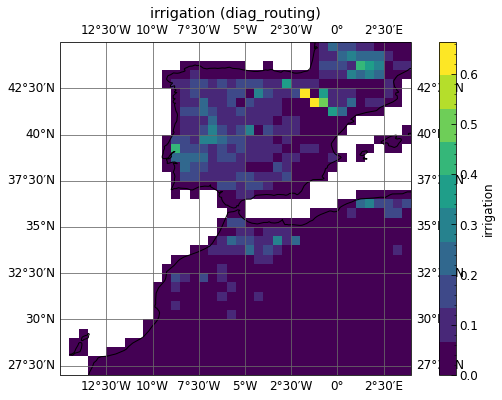

In [129]:
#Display map of var for ds
var='irrigation'
ds = natDIAG
plotvar = ds[var].mean(dim='time')
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
#use colormap reds
plotvar.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=myvir)
plt.title(var + ' (' + ds.name + ')')

In [ ]:
#Display map of var for ds on restricted area
var='hydrographs'
ds = std
# ds = std
latmin=36.0
latmax=41.0
lonmin=-5.0
lonmax=-10.0

#restrict ds to latmin, latmax, lonmin, lonmax
ds = ds.where(ds.lat >= latmin, drop=True)
ds = ds.where(ds.lat <= latmax, drop=True)
ds = ds.where(ds.lon >= lonmin, drop=True)
ds = ds.where(ds.lon <= lonmax, drop=True)
plotvar = ds[var].mean(dim='time')
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
#use colormap reds
plotvar.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=reds)
plt.title(var + ' (' + ds.name + ')')

In [ ]:
#Display map of var for ds averaged on a given year
var='hydrographs'
year=2012
ds = natDIAG_R
ds = ds.where(ds['time.year'] == year, drop=True)
plotvar = ds[var].mean(dim='time')
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
#use colormap reds
plotvar.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=myvir)
plt.title(var + ' (' + ds.name + ')')

Text(0.5, 1.0, 'irrigation (diag_routing)')

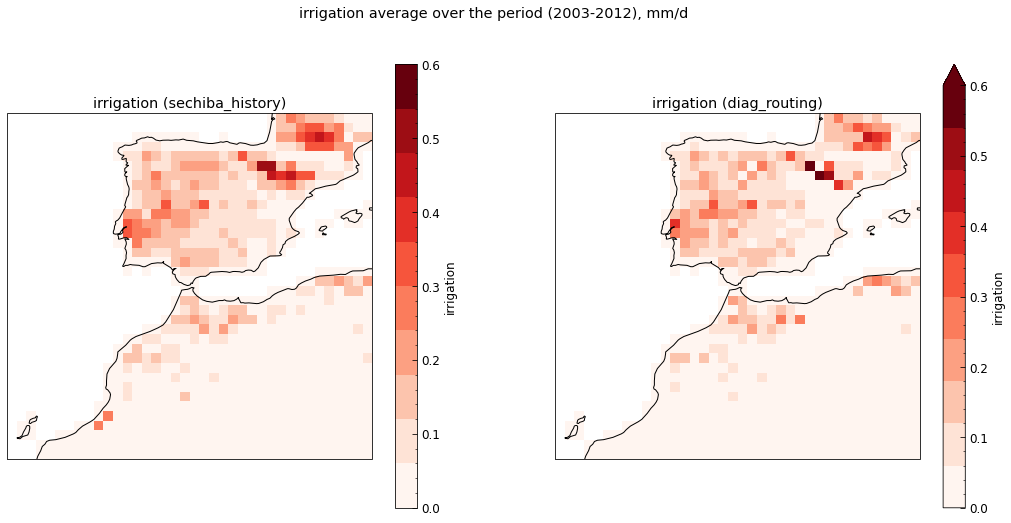

In [130]:
# Display map of var from 2 datasets
var = 'irrigation'

# First Dataset
ds_std = std
plotvar_std = ds_std[var].mean(dim='time')

# Second Dataset
ds_nat = natDIAG
plotvar_nat = ds_nat[var].mean(dim='time')

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle(var + ' average over the period (2003-2012), ' + ds_std[var].units)

# Plot for std dataset
axs[0].coastlines()
plotvar_std.plot(ax=axs[0], transform=ccrs.PlateCarree(), cmap=reds,vmax=0.6)
axs[0].set_title(f'{var} ({ds_std.name})')

# Plot for natORC dataset
axs[1].coastlines()
plotvar_nat.plot(ax=axs[1], transform=ccrs.PlateCarree(), cmap=reds,vmax=0.6)
axs[1].set_title(f'{var} ({ds_nat.name})')

In [ ]:
#RMSE map
#Needed to plot RMSE on runoff or drainage (remember to revert it at the end)
natDIAG = natDIAG.rename({'lat':'lat_domain_landpoints_routing','lon':'lon_domain_landpoints_routing'})
natDIAG = natDIAG.rename({'lat_domain_landpoints':'lat','lon_domain_landpoints':'lon'})

var='runoff'
ds1=natORC
ds2=natDIAG
#compute RMSE between ds1 and ds2
rmse = np.sqrt(((ds1[var]-ds2[var])**2).mean(dim='time'))
rel_rmse = rmse/ds2[var].mean(dim='time')

#output the value of the rmse after spatial averaging over all grid points
print(var + ' RMSE (' + ds1.name + '-' + ds2.name+ ', spatial and temporal mean) : ' + str(rmse.mean(dim=['lon','lat']).values))

#display map of rmse
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
rmse.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=reds)
plt.title(var + ' average RMSE  (' + ds1.name + ' - ' + ds2.name + ')')

#revert dimension name change done above
natDIAG = natDIAG.rename({'lat':'lat_domain_landpoints','lon':'lon_domain_landpoints'})
natDIAG = natDIAG.rename({'lat_domain_landpoints_routing':'lat','lon_domain_landpoints_routing':'lon'})

In [ ]:
#Diff map
var='slowr'
ds1=natORC
ds2=std
#compute diff between ds1 and ds2
diff = (ds1[var]-ds2[var]).mean(dim='time')
rel_diff = ((ds1[var]-ds2[var]) / (ds2[var] + 1E-16)).mean(dim='time')
# Transform rel_diff using log10
rel_diff_log = np.log10(rel_diff)
#display map
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
# rel_diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=emb)
diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=emb)
plt.title(var + ' difference (' + ds1.name + ' - ' + ds2.name + ')')

In [ ]:
#RMSE and rRMSE values for multiple variables
varlist=['streamr', 'fastr', 'slowr']
# varlist=['drainage', 'runoff']
ds1=natORC
ds2=std
#compute RMSE between ds1 and ds2
for var in varlist:
    rmse = np.sqrt(((ds1[var]-ds2[var])**2).mean(dim='time'))
    # rel_rmse = rmse/ds2[var].mean(dim='time')
    #output the value of the rmse after spatial averaging over all grid points
    print(var + ' RMSE (' + ds1.name + '-' + ds2.name+ ', spatial and temporal mean) : ' + str((rmse.mean(dim=['lon','lat']).values)))
    # print(var + ' rRMSE (' + ds1.name + '-' + ds2.name+ ', spatial and temporal mean) : ' + str((rel_rmse.mean(dim=['lon','lat']).values)))

# Time series

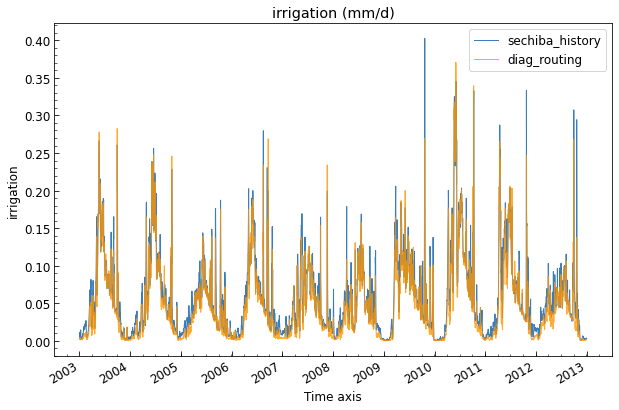

In [134]:
#Average time series
var='irrigation'
year_min=2003
year_max=2012
ds1=std
ds1 = ds1.where(ds1['time.year'] >= year_min, drop=True).where(ds1['time.year'] <= year_max, drop=True)
ds2=natDIAG
ds2 = ds2.where(ds2['time.year'] >= year_min, drop=True).where(ds2['time.year'] <= year_max, drop=True)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ds1[var].mean(dim=['lon','lat']).plot(ax=ax, label=ds1.name)
ds2[var].mean(dim=['lon','lat']).plot(ax=ax, label=ds2.name)
plt.title(var + (' (mm/d)'))
plt.legend()

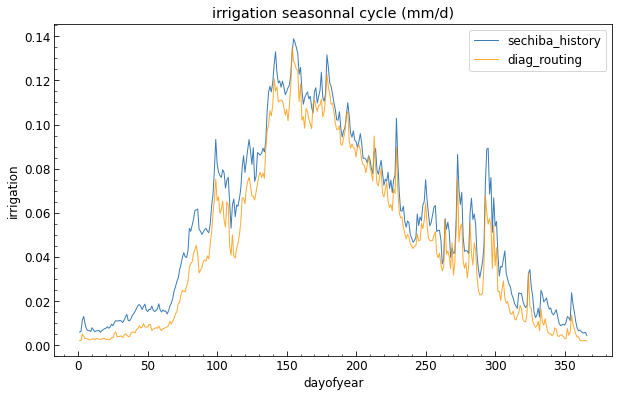

In [136]:
#Average seasonnal cycle
var='irrigation'
year_min=2003
year_max=2012
ds1=std
ds1 = ds1.where(ds1['time.year'] >= year_min, drop=True).where(ds1['time.year'] <= year_max, drop=True)
ds2=natDIAG
ds2 = ds2.where(ds2['time.year'] >= year_min, drop=True).where(ds2['time.year'] <= year_max, drop=True)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ds1[var].mean(dim=['lon','lat']).groupby('time.dayofyear').mean(dim='time').plot(ax=ax, label=ds1.name)
ds2[var].mean(dim=['lon','lat']).groupby('time.dayofyear').mean(dim='time').plot(ax=ax, label=ds2.name)
plt.title(var + (' seasonnal cycle (mm/d)'))
plt.legend()

# Hydrographs en un point

In [ ]:
river_coordinates = {
    'Ebre': {'lon': 0.75, 'lat': 40.75},
    'Minho': {'lon': -8.75, 'lat': 42.25},
    'Tage': {'lon': -9.25, 'lat': 39.25},
    'Douro': {'lon': -8.75, 'lat': 41.25},
    'Guadiana': {'lon': -7.25, 'lat': 38.25},
    'Guadalquivir': {'lon': -6.25, 'lat': 36.75}
}
river_coordinates_native = {
    'Ebre': {'lon': 0.86, 'lat': 40.725},
    'Minho': {'lon': -8.875, 'lat': 41.86},
    'Tage': {'lon': -9.175, 'lat': 38.6875},
    'Douro': {'lon': -8.675, 'lat': 41.1375},
    'Guadiana': {'lon': -7.39, 'lat': 37.175},
    'Guadalquivir': {'lon': -6.34, 'lat': 36.79}
}

In [ ]:
#Time series
year_min=2003
year_max=2012
# Ebre
# lon=0.75
# lat=40.75
# lon=0.86
# lat=40.725
#Minho
# lat=41.86
# lon=-8.875
# # Tage
# lon=-9.25
# lat=39.25
# lon=-9.175
# lat=38.6875
# Douro
# lon=-8.75
# lat=41.25
# lon=-8.675
# lat=41.1375
# # Guadiana
# lon=-7.25
# lat=38.25
# lon=-7.39
# lat=37.175
# # Guadalquivir
# lon=-6.25
# lat=36.75
lon=-6.34
lat=36.79

var="hydrographs"
ds1=std
ds1 = ds1.where(ds1['time.year'] >= year_min, drop=True).where(ds1['time.year'] <= year_max, drop=True)
ds2=natDIAG_R
ds2 = ds2.where(ds2['time.year'] >= year_min, drop=True).where(ds2['time.year'] <= year_max, drop=True)
#plot the time series of hydrographs at the point (lon,lat)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ax.set_ylabel('hydrographs')
# ds1[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds1.name)
ds2[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds2.name)
# ds2['runoff'].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label='runoff')
plt.title('hydrographs at (' + str(lon) + ',' + str(lat) + '), m³/s')
plt.legend()

In [ ]:
#Time series
year_min=2003
year_max=2012
lon=-8.875
lat=41.86
ds1=natDIAG_R
ds1 = ds1.where(ds1['time.year'] >= year_min, drop=True).where(ds1['time.year'] <= year_max, drop=True)
#plot the time series of hydrographs at the point (lon,lat)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ds1['runoff'].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label='runoff',c='green')
ds1['drainage'].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label='drainage',c='brown')
# ['rain'].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label='rainfall',c='blue')
plt.title('Runoff and drainage at (' + str(lon) + ',' + str(lat) + '), mm/d')
plt.legend()

In [ ]:
#Cycle saisonnier (moyenne par jour de l'année)
var="hydrographs"
#Ebre
# lon=0.75
# lat=40.75
# # Tage
# lon=-9.25
# lat=39.25
# # Douro
# lon=-8.75
# lat=41.25
# # Guadiana
lon=-7.25
lat=38.25
# # Guadalquivir
# lon=-6.25
# lat=36.75
ds1=std
ds2=natDIAG_R
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ax.set_xlabel('month')
ax.set_ylabel('hydrographs')
ax.set_title('hydrographs at (' + str(lon) + ',' + str(lat) + ')')
#compute the annual cycle of hydrographs at the point (lon,lat)
ds1[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.dayofyear').mean(dim='time').plot(ax=ax, label=ds1.name)
ds2[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.dayofyear').mean(dim='time').plot(ax=ax, label=ds2.name)
plt.legend()

In [ ]:
#cycle saisonnier pour 6 points de grille
var = "hydrographs"
ds1 = std
ds2 = natDIAG_R

# Create subplots for each river in a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over rivers and plot hydrographs
for i, (river, coordinates) in enumerate(river_coordinates.items()):
    lon = coordinates['lon']
    lat = coordinates['lat']
    
    ax = axes[i]

    #Compute the annual cycle of hydrographs at the point (lon, lat) for each dataset
    ds1[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds1.name)

for i, (river, coordinates) in enumerate(river_coordinates_native.items()):
    lon = coordinates['lon']
    lat = coordinates['lat']
    
    ax = axes[i]

    # Compute the annual cycle of hydrographs at the point (lon, lat) for each dataset
    ds2[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds2.name)
    
    ax.legend()
    #set subplot title to river name
    ax.set_title(river)

# Remove any remaining empty subplots
for i in range(len(river_coordinates), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Cycle saisonnier du débit à l'exutoire (m³/s, 2003-2012)")
plt.tight_layout()

In [ ]:
#série temporelle pour 6 points de grille
var = "hydrographs"
ds1 = std_month
ds2 = natDIAG_R

# Create subplots for each river in a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over rivers and plot hydrographs
for i, (river, coordinates) in enumerate(river_coordinates.items()):
    lon = coordinates['lon']
    lat = coordinates['lat']
    
    ax = axes[i]

    # Compute the annual cycle of hydrographs at the point (lon, lat) for each dataset
    # ds1[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds1.name)

for i, (river, coordinates) in enumerate(river_coordinates_native.items()):
    lon = coordinates['lon']
    lat = coordinates['lat']
    
    ax = axes[i]

    # Compute the annual cycle of hydrographs at the point (lon, lat) for each dataset
    ds2[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds2.name)
    
    ax.legend()
    #set subplot title to river name
    ax.set_title(river)

# Remove any remaining empty subplots
for i in range(len(river_coordinates), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Série temporelle du débit à l'exutoire (m³/s)")
plt.tight_layout()